In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (assuming Excel format; adjust the path accordingly)
file_path = 'ECOMM DATA.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Display basic information about the dataset
print("Basic Information About the Dataset:")
print(df.info())

Basic Information About the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      5

In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            Row ID                     Order Date  \
count  51290.00000                          51290   
mean   25645.50000  2013-05-11 21:26:49.155781120   
min        1.00000            2011-01-01 00:00:00   
25%    12823.25000            2012-06-19 00:00:00   
50%    25645.50000            2013-07-08 00:00:00   
75%    38467.75000            2014-05-22 00:00:00   
max    51290.00000            2014-12-31 00:00:00   
std    14806.29199                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          51290   9994.000000  51290.000000   
mean   2013-05-15 20:42:42.745174528  55190.379428    246.490581   
min              2011-01-03 00:00:00   1040.000000      0.444000   
25%              2012-06-23 00:00:00  23223.000000     30.758625   
50%              2013-07-12 00:00:00  56430.500000     85.053000   
75%              2014-05-26 00:00:00  90008.000000    251.053200   
max              2015-01-

In [ ]:
# Data Preparation
# Convert 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Check for missing values and fill or drop them
df.dropna(subset=['Sales', 'Profit', 'Quantity'], inplace=True)

# Converting necessary columns to appropriate types
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [ ]:
# Calculating total sales
total_sales = df['Sales'].sum()
print(f"\nTotal Sales: ${total_sales:.2f}")


Total Sales: $12642501.91


In [ ]:
# Set the index to 'Order Date' for resampling
df.set_index('Order Date', inplace=True)

# Sales Trends Over Time - Monthly sales
# Make sure to exclude any non-numeric columns from the sum operation
monthly_sales = df[['Sales']].resample('M').sum()

# Best-Selling Products
top_products_revenue = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
top_products_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

# Best-Selling Customers
top_customers_revenue = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)
top_customers_quantity = df.groupby('Customer Name')['Quantity'].sum().sort_values(ascending=False)

<Figure size 1000x600 with 0 Axes>

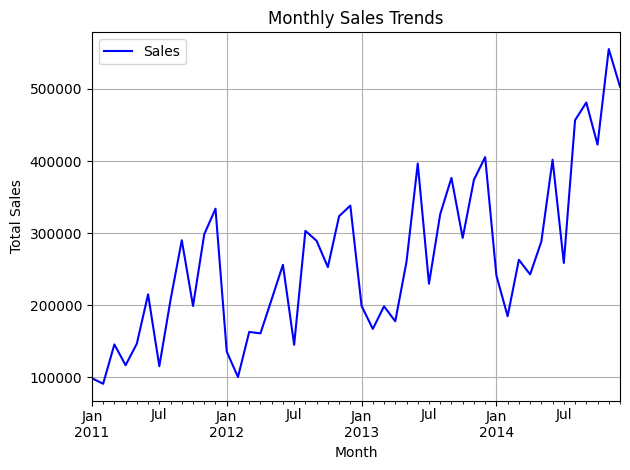

In [ ]:
# Plotting Monthly Sales Trends
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title='Monthly Sales Trends', color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()  # Add a break before the next plot
plt.show()

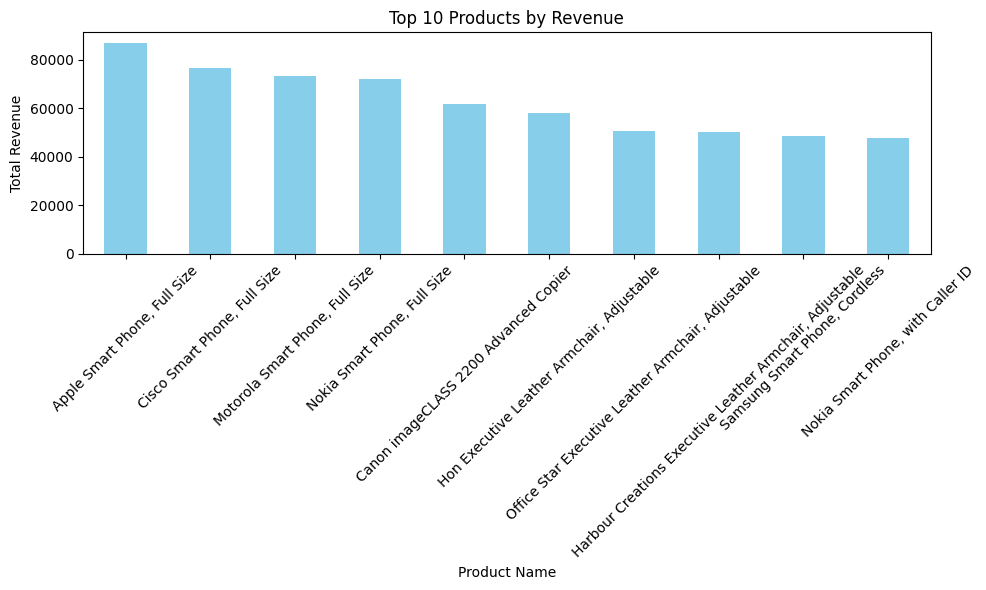

In [ ]:
# Plotting Top 10 Best-Selling Products by Revenue
plt.figure(figsize=(10, 6))
top_products_revenue.head(10).plot(kind='bar', color='skyblue', title='Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()  # Add a break before the next plot
plt.show()

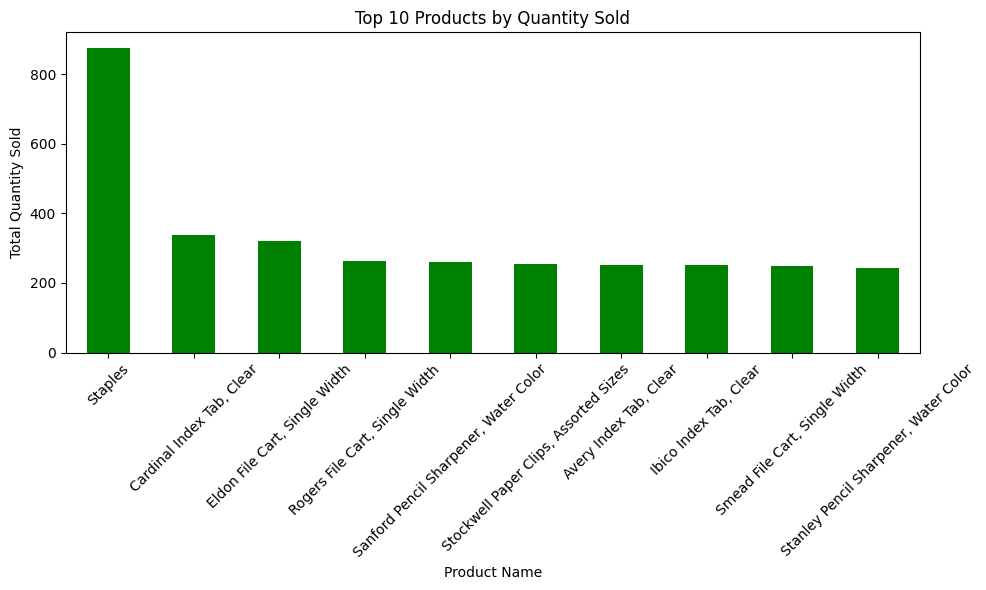

In [ ]:
# Plotting Top 10 Best-Selling Products by Quantity
plt.figure(figsize=(10, 6))
top_products_quantity.head(10).plot(kind='bar', color='green', title='Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()  # Add a break before the next plot
plt.show()

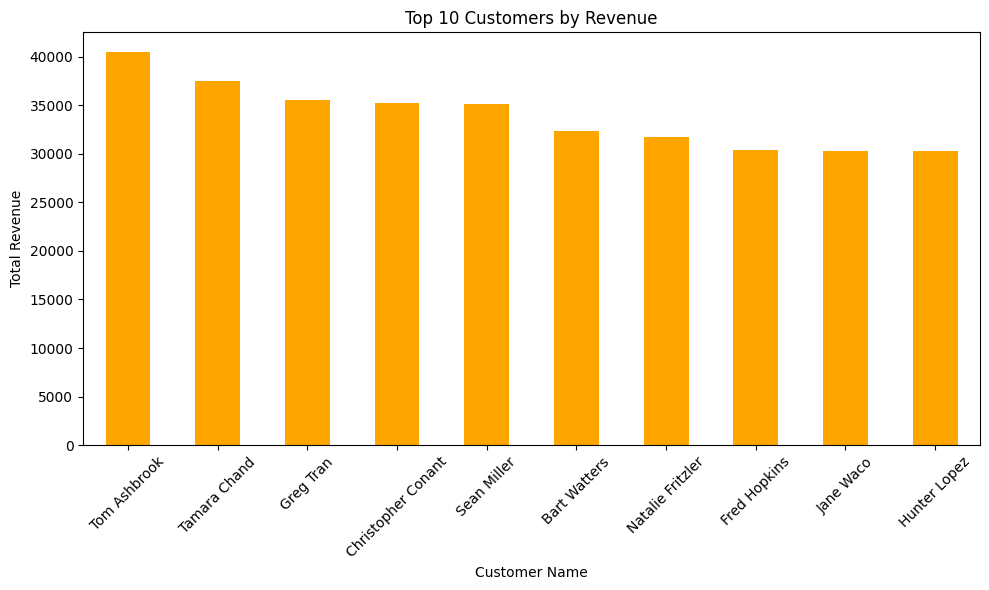

In [ ]:
# Plotting Top 10 Best-Selling Customers by Revenue
plt.figure(figsize=(10, 6))
top_customers_revenue.head(10).plot(kind='bar', color='orange', title='Top 10 Customers by Revenue')
plt.xlabel('Customer Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()  # Add a break before the next plot
plt.show()

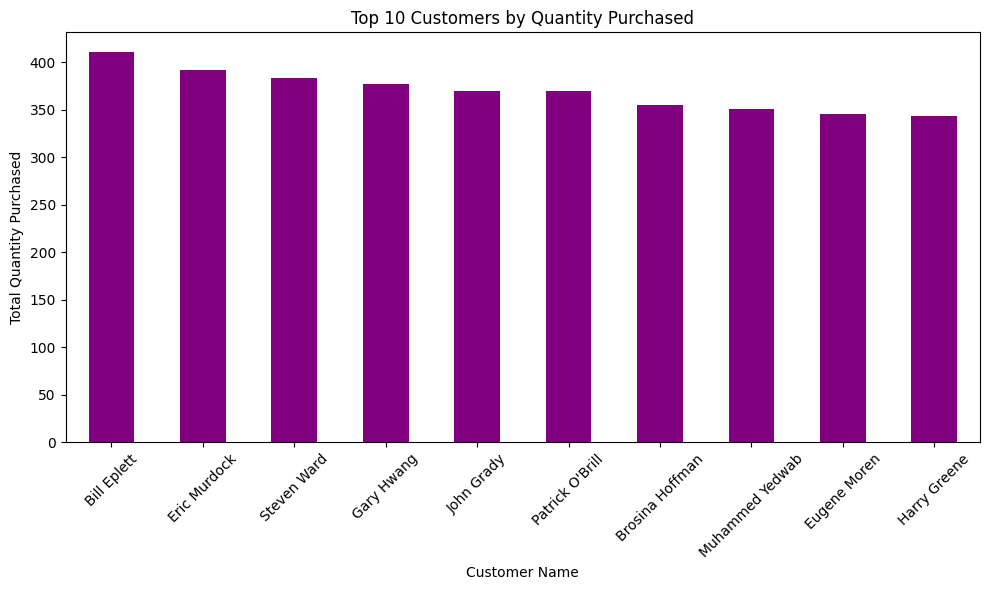

In [ ]:
# Plotting Top 10 Best-Selling Customers by Quantity
plt.figure(figsize=(10, 6))
top_customers_quantity.head(10).plot(kind='bar', color='purple', title='Top 10 Customers by Quantity Purchased')
plt.xlabel('Customer Name')
plt.ylabel('Total Quantity Purchased')
plt.xticks(rotation=45)
plt.tight_layout()  # Add a break before the next plot
plt.show()

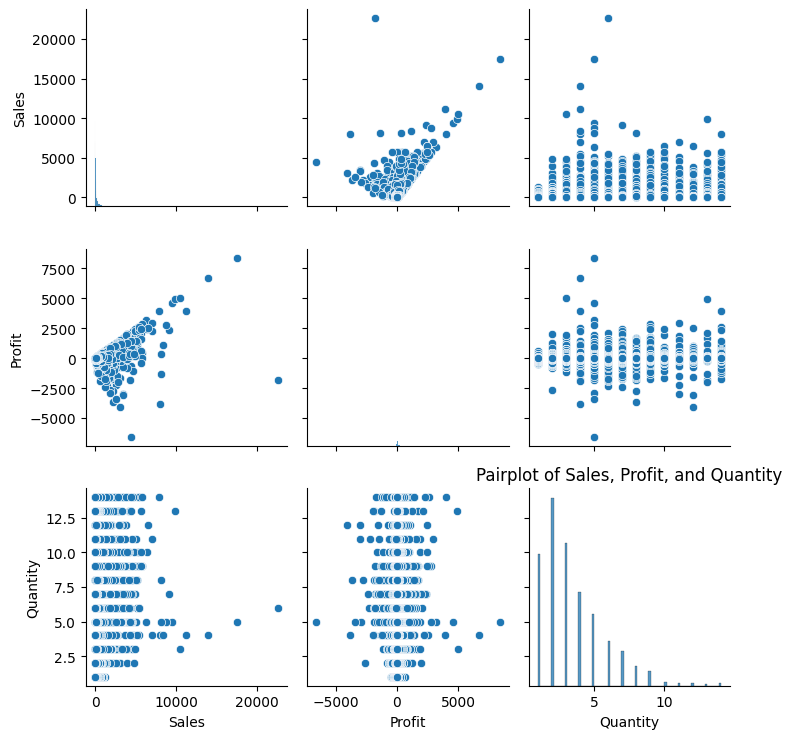

In [ ]:
# Additional Visualizations and Analysis
# Pairplot to explore relationships between numeric variables
sns.pairplot(df[['Sales', 'Profit', 'Quantity']])
plt.title('Pairplot of Sales, Profit, and Quantity')
plt.tight_layout()
plt.show()

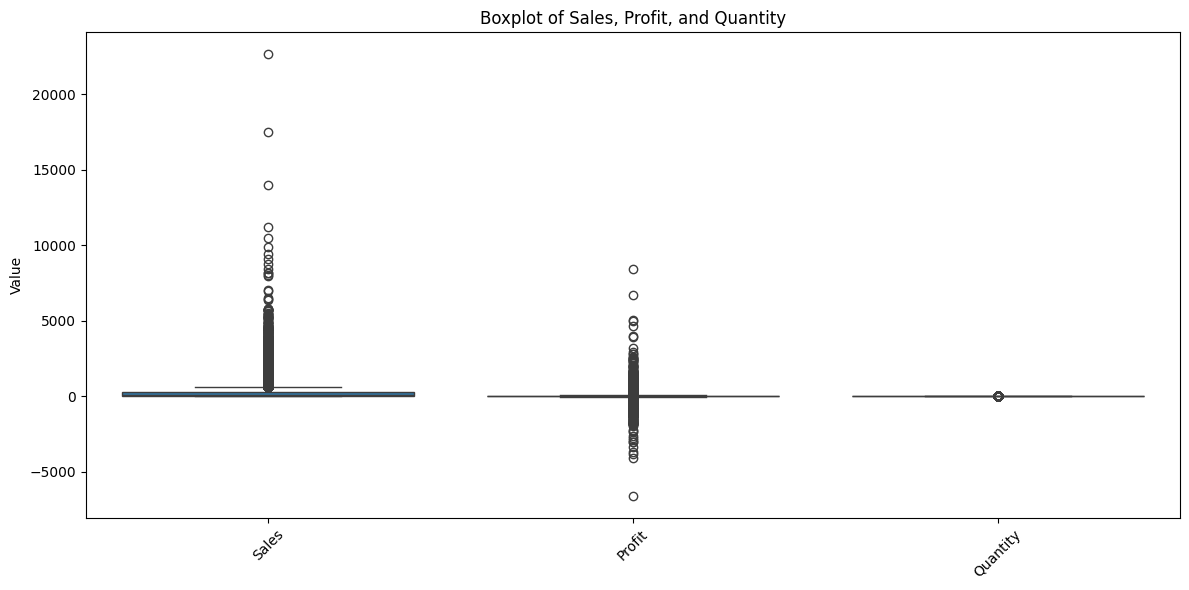

In [ ]:
# Boxplot to visualize the distribution of Sales, Profit, and Quantity
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Sales', 'Profit', 'Quantity']])
plt.title('Boxplot of Sales, Profit, and Quantity')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

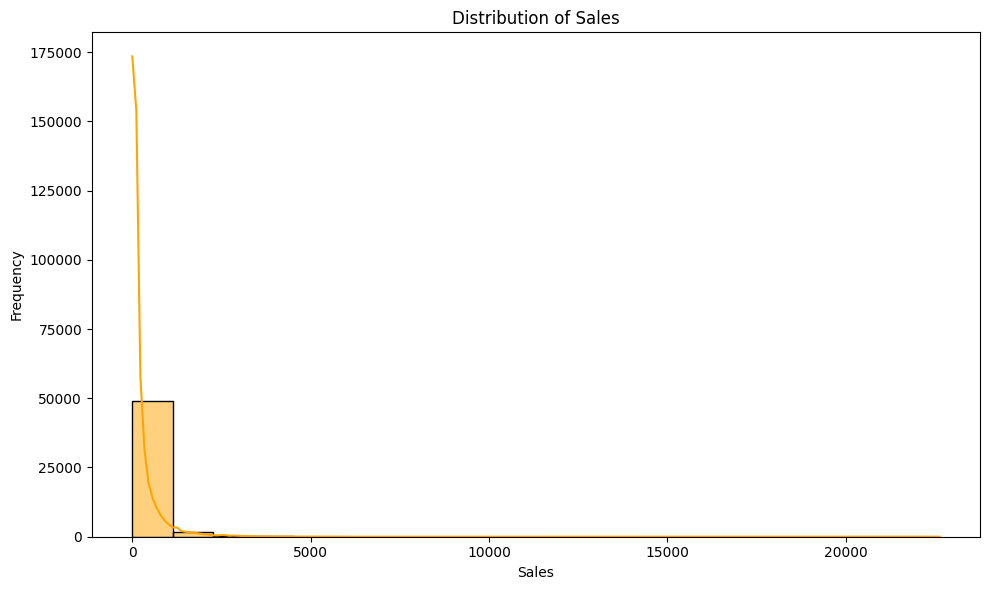

In [ ]:
# Distribution of Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True, color='orange')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

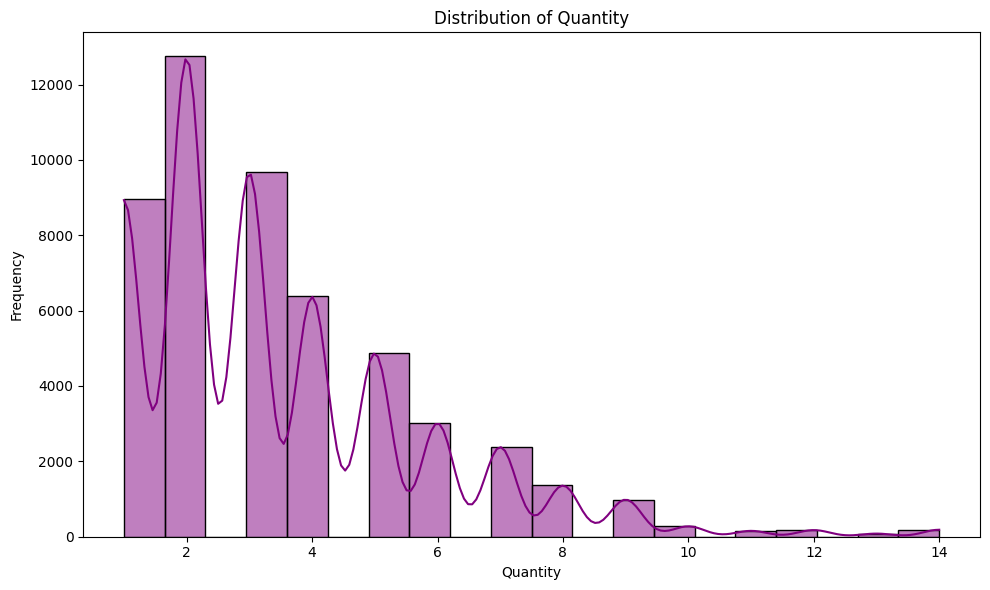

In [ ]:
# Distribution of Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=20, kde=True, color='purple')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

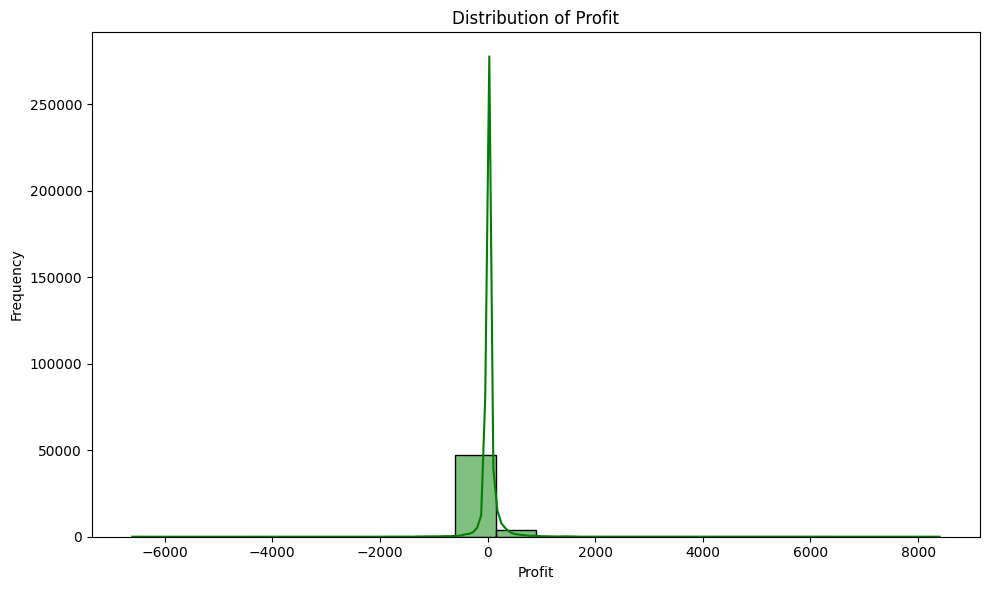

In [ ]:
# Distribution of Profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=20, kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

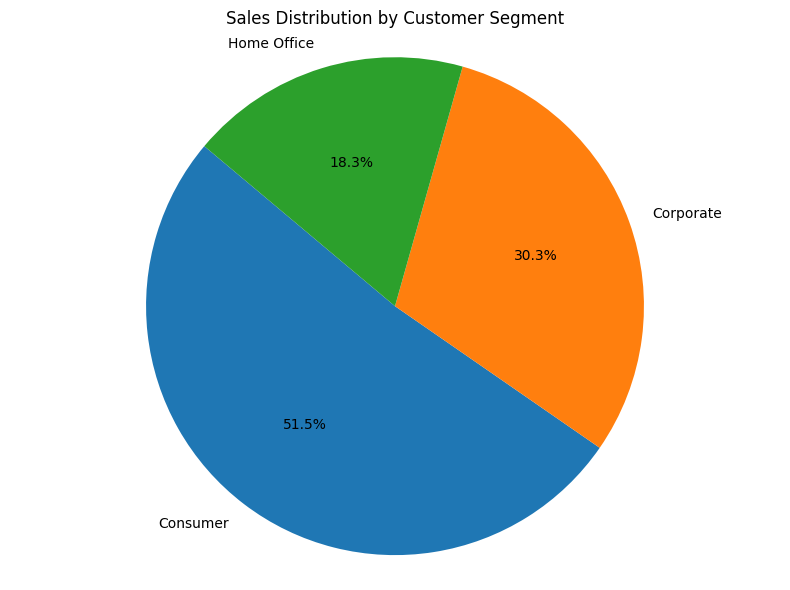

In [ ]:
# Sales by Customer Segment - Pie chart
customer_segment_sales = df.groupby('Segment')['Sales'].sum()
plt.figure(figsize=(8, 6))
plt.pie(customer_segment_sales, labels=customer_segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Customer Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

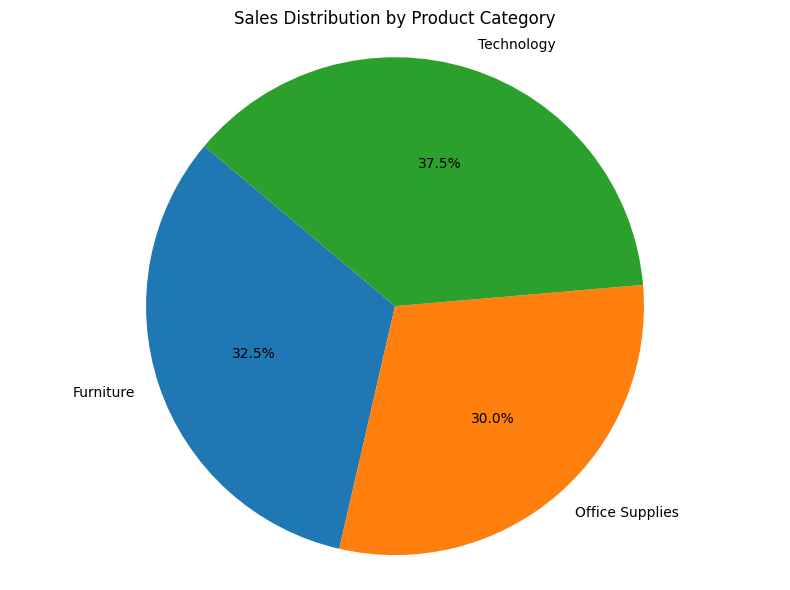

In [ ]:
# Sales by Product Category - Pie chart
product_category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(8, 6))
plt.pie(product_category_sales, labels=product_category_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()